In [252]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from venny4py.venny4py import *

## Exploratory Analysis

### Initial Visualization

In [253]:
df = pd.read_csv('data.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [254]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [256]:
for i in df.isnull().sum():
    if i != 0:
        print('We have a null entry')

### Visualizing Distribution

<Axes: ylabel='JobRole'>

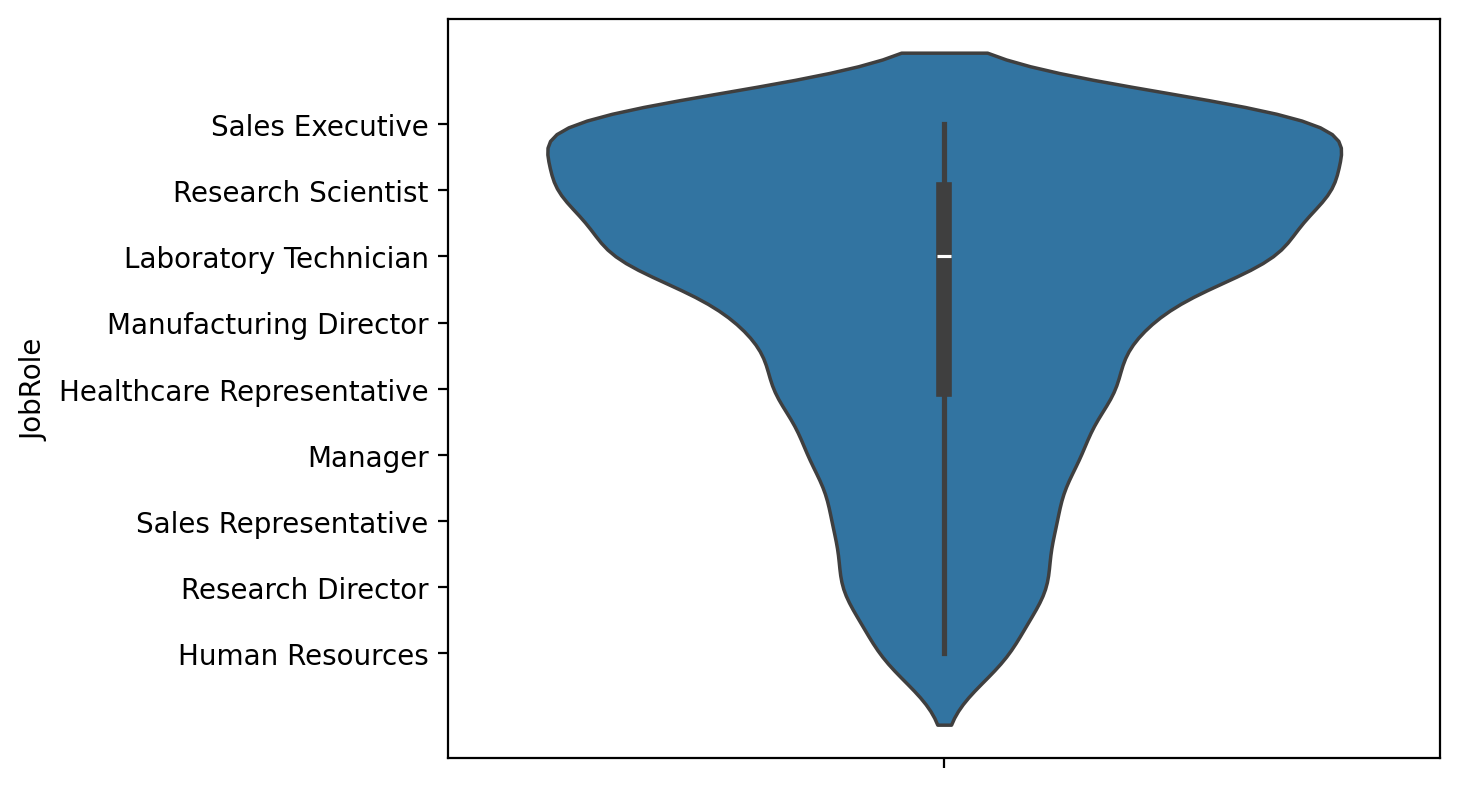

In [257]:
sns.violinplot(df['JobRole'])

### Relation of Education Field and Attrition to Income

In [258]:
df[['EducationField', 'MonthlyIncome']].groupby(by=['EducationField']).max()

,MonthlyIncome
EducationField,
Human Resources,19636
Life Sciences,19999
Marketing,19845
Medical,19859
Other,19613
Technical Degree,19943


In [259]:
df[['Attrition', 'MonthlyIncome']].groupby(by=['Attrition']).max()

,MonthlyIncome
Attrition,
No,19999
Yes,19859


## Modelling

### Normalizing

In [260]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [261]:
scaler = StandardScaler()
fit = scaler.fit(df[numerical_columns])
df[numerical_columns] = fit.transform(df[numerical_columns])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,Yes,Travel_Rarely,0.742527,Sales,-1.010909,-0.891688,Life Sciences,0.0,-1.701283,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,No,Travel_Frequently,-1.297775,Research & Development,-0.147150,-1.868426,Life Sciences,0.0,-1.699621,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,Yes,Travel_Rarely,1.414363,Research & Development,-0.887515,-0.891688,Other,0.0,-1.696298,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,No,Travel_Frequently,1.461466,Research & Development,-0.764121,1.061787,Life Sciences,0.0,-1.694636,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,No,Travel_Rarely,-0.524295,Research & Development,-0.887515,-1.868426,Medical,0.0,-1.691313,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


### Encoding

In [262]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [263]:
encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(encoder.fit_transform)

if df.select_dtypes(include=['object']).columns.array.size == 0:
    print("Categorical data encoded!")

df.head()

Categorical data encoded!


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,0.0,-1.701283,...,-1.584178,0.0,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.0,-1.699621,...,1.191438,0.0,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,0.0,-1.696298,...,-0.658973,0.0,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,0.0,-1.694636,...,0.266233,0.0,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,0.0,-1.691313,...,1.191438,0.0,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [264]:
constant_columns = []
for column in df.columns:
    unique_values = df[column].unique()
    if len(unique_values) == 1:
        constant_columns.append(column)

df.drop(columns=constant_columns, inplace=True)

print("Constant columns dropped:", constant_columns)

Constant columns dropped: ['EmployeeCount', 'Over18', 'StandardHours']


### Random Forest Based on Various Feature Selection Techniques

#### Splitting Data

In [265]:
X = df.drop(['Attrition'], axis=1).values
y = df['Attrition'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [266]:
RandomForest = RandomForestClassifier(n_estimators = 100)

In [267]:
def plot_conf_matrixes(conf1, title1, conf2, title2, conf3, title3):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.heatmap(conf1, ax=axes[0], annot=True, fmt="d")
    sns.heatmap(conf2, ax=axes[1], annot=True, fmt="d")
    sns.heatmap(conf3, ax=axes[2], annot=True, fmt="d")

    axes[0].set_title(title1)
    axes[1].set_title(title2)
    axes[2].set_title(title3)

    plt.suptitle('Confusion Matrices', fontsize=16)
    plt.tight_layout()
    plt.show()

#### Mutual Information, Anova and Smart Correlated Groups

In [268]:
MutualInformation = SelectKBest(mutual_info_classif, k=31)
Anova = SelectKBest(f_classif, k=31)
SmartCorr = SmartCorrelatedSelection(
    method='pearson',
    threshold=0.8,
    selection_method='variance',
    estimator=None
)

In [269]:
MI_RF = Pipeline(
    [('Mutual Information', MutualInformation),
     ('Random Forest', RandomForest)]
)

MI_RF.fit(X_train, y_train)
MI_RF_pred = MI_RF.predict(X_test)

MI_RF_score = MI_RF.score(X_train, y_train)
MI_RF_test = MI_RF.score(X_test, y_test)
print('Training score using mutual information',MI_RF_score)
print('Testing score using mutual information', MI_RF_test)

MI_RF_conf_matrix = confusion_matrix(y_test, MI_RF_pred)
print(classification_report(y_test, MI_RF_pred))

Training score using mutual information 1.0
Testing score using mutual information 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       374
           1       0.70      0.10      0.18        67

    accuracy                           0.86       441
   macro avg       0.78      0.55      0.55       441
weighted avg       0.84      0.86      0.81       441



In [270]:
AN_RF = Pipeline(
    [('Anova', Anova),
     ('Random Forest', RandomForest)]
)

AN_RF.fit(X_train, y_train)
AN_RF_pred = AN_RF.predict(X_test)

AN_RF_score = AN_RF.score(X_train, y_train)
AN_RF_test = AN_RF.score(X_test, y_test)

print('Training score using Anova', AN_RF_score)
print('Testing score using Anova', AN_RF_test)

AN_RF_conf_matrix = confusion_matrix(y_test, AN_RF_pred)
print(classification_report(y_test, AN_RF_pred))

Training score using Anova 1.0
Testing score using Anova 0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       374
           1       0.70      0.10      0.18        67

    accuracy                           0.86       441
   macro avg       0.78      0.55      0.55       441
weighted avg       0.84      0.86      0.81       441



In [271]:
SC_RF = Pipeline(
    [('Smart Correlated Groups', SmartCorr),
     ('Random Forest', RandomForest)]
)

SC_RF.fit(X_train, y_train)
SC_RF_pred = SC_RF.predict(X_test)

SC_RF_score = SC_RF.score(X_train, y_train)
SC_RF_test = SC_RF.score(X_test, y_test)

print('Training score using smart correlated groups', SC_RF_score)
print('Testing score using smart correlated groups', SC_RF_test)

SC_RF_conf_matrix = confusion_matrix(y_test, SC_RF_pred)
print(classification_report(y_test, AN_RF_pred))

Training score using smart correlated groups 1.0
Testing score using smart correlated groups 0.8662131519274376
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       374
           1       0.70      0.10      0.18        67

    accuracy                           0.86       441
   macro avg       0.78      0.55      0.55       441
weighted avg       0.84      0.86      0.81       441



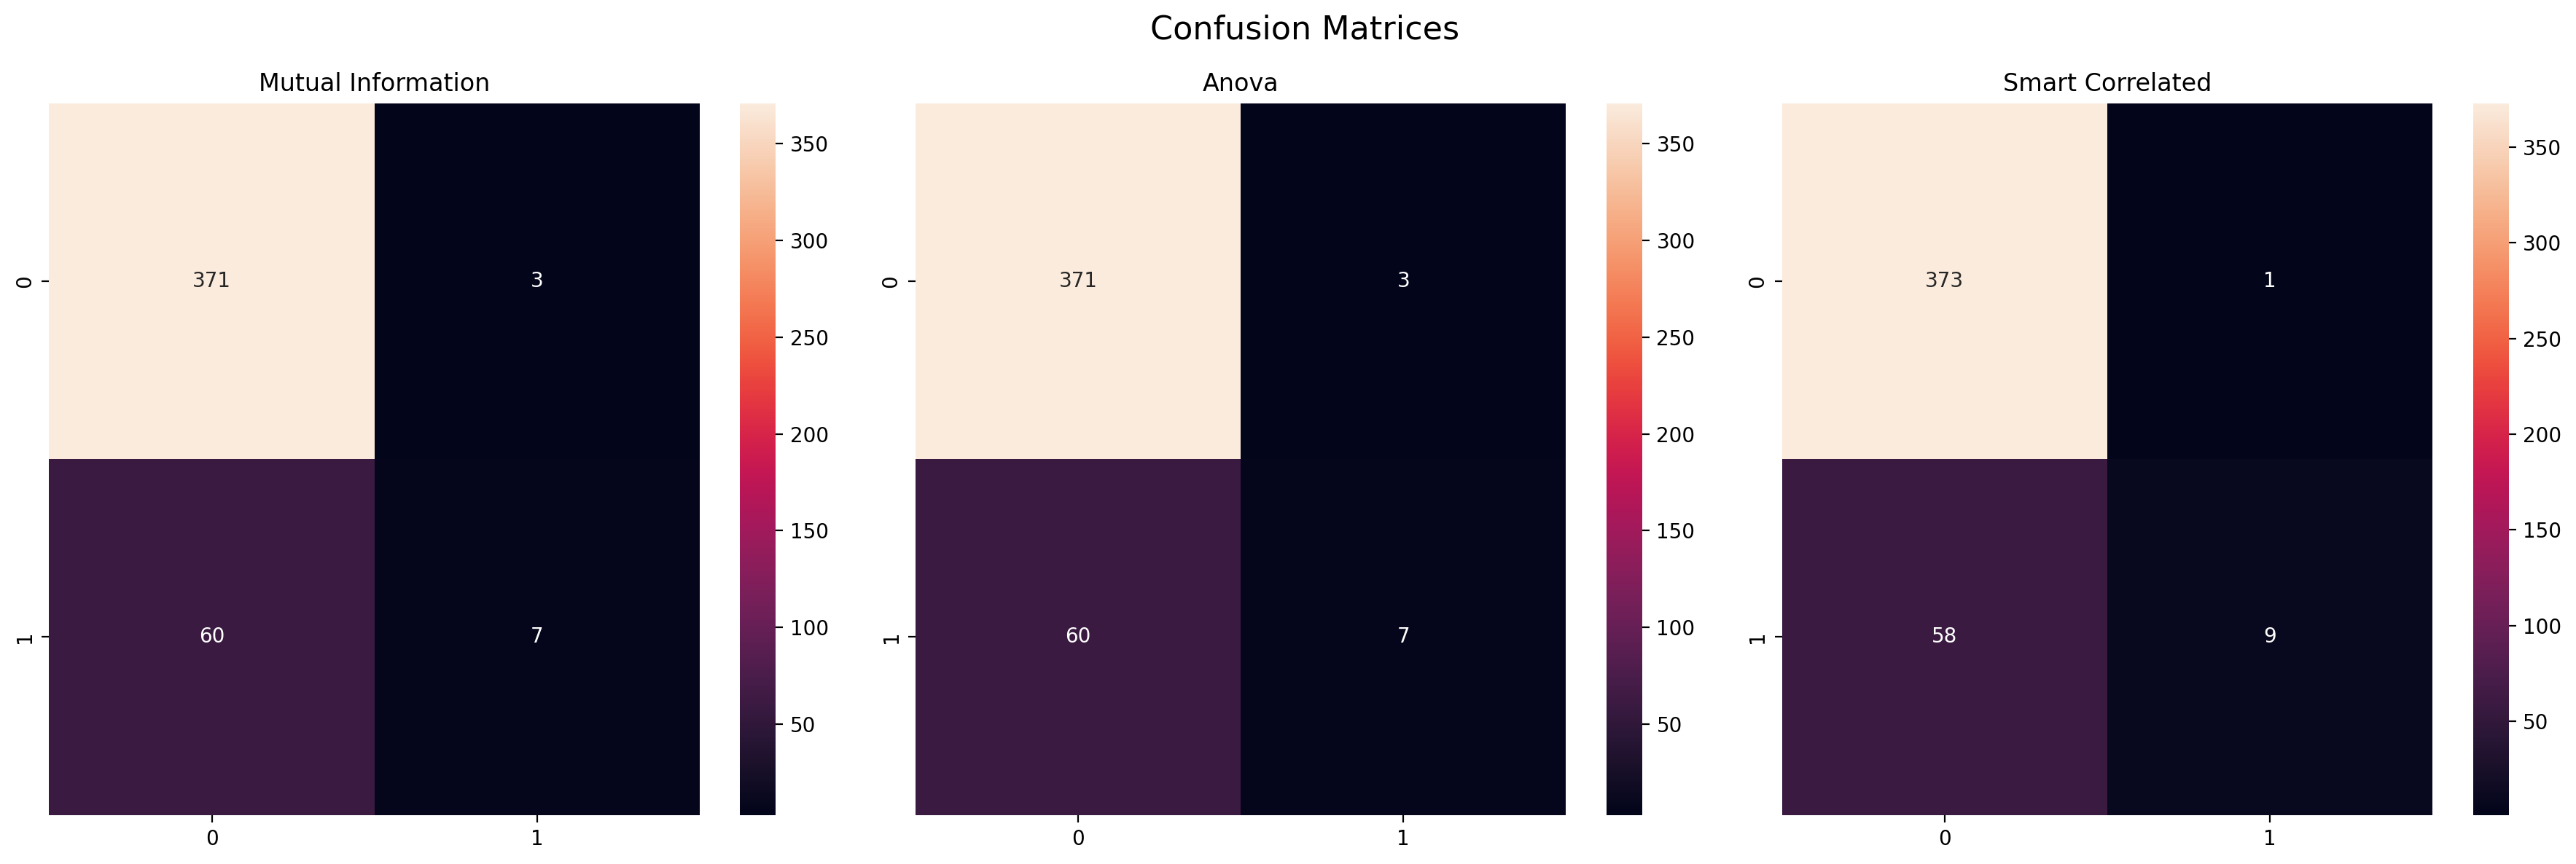

In [272]:
plot_conf_matrixes(MI_RF_conf_matrix, 'Mutual Information', AN_RF_conf_matrix, 'Anova', SC_RF_conf_matrix, 'Smart Correlated')

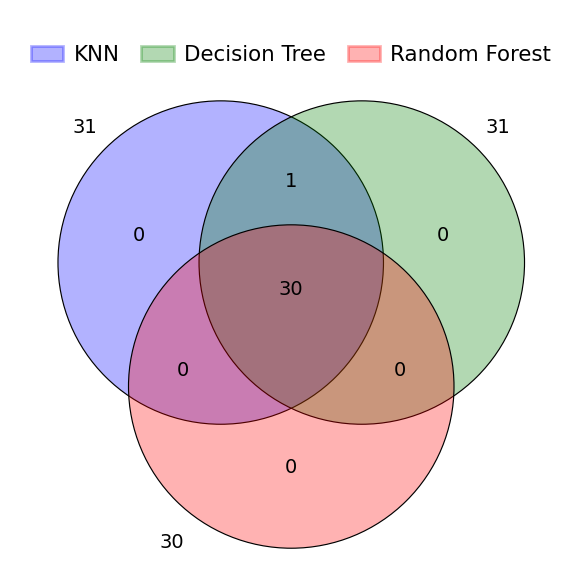

In [273]:
features_MI_RF = MI_RF[:-1].get_feature_names_out(input_features=column_names)
features_AN_RF = AN_RF[:-1].get_feature_names_out(input_features=column_names)
features_SC_RF = SC_RF[:-1].get_feature_names_out(input_features=column_names)

sets = {
    'KNN': set(features_MI_RF),
    'Decision Tree': set(features_AN_RF),
    'Random Forest': set(features_SC_RF)
}

venny4py(sets=sets)

In [274]:
set(features_MI_RF).intersection(features_AN_RF, features_SC_RF)

{'Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion'}